# Data Analysis of Division of Linguistic Labor Experiment

### Protocol

Aquí la información sobre el protocolo.

### Datasets

Arreglar esto de acuerdo a la plantilla del README

Data comes from two files: performance.csv and rep-comprension.csv

The former contains a dataframe where each row represents each of the five dogs presented during each round per each player and each stage of the experiment, with the following columns:

1. treatment: single or dyad. 
2. dyad: dyad's name.
3. player: player's id.
4. expert_in: refers to the player's expert-dogs (terriers or hounds), that is, the kinds of dogs on which the player trained during training rounds.
5. novice_in: refers to the player's novice-dogs (terriers or hounds).
6. stage: experiment's stage (training or game).
7. round: round of the respective stage.
8. kind: dog's kind.
9. classif: refers to the label the player used to classify the dog.
10. accuracy: whether classification was correct (0=incorrect/1=correct).
11. queried: number of times the player asked partner about dog (NaN if no query was made or if player belongs to treatment==single).
12. label: label used by player to query partner (NaN if player didn't query or treatment==single).
13. answered: proportion of times query was answered by partner.
14. answer_correct: whether partner's answer was correct or not (0=incorrect/1=correct).

The latter contains a dataframe where each row represents the score on label understanding per player and per kind of dog, with the following columns:

1. treatment: single or dyad. 
2. dyad: dyad's name.
3. player: player's id.
4. kind: the dog's kind.
5. expertise: whether the player was trained on this kind of dog or not (experts or novices).
6. report: player's reported understanding score on this kind of dog.
7. accuracy: mean accuracy over game rounds on this kind of dog.
8. query: proportion of times the player queried their partner on this kind of dog.
9. answered: proportion of times queries on this kind of dog were answered by partner.
10. player_responded: proportion of times player responded to queries on this kind of dog.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats

In [5]:
data = pd.read_csv('performance.csv')
data.head()

,treatment,dyad,player,expert_in,novice_in,stage,round,kind,classif,accuracy,queried,answered,answer_correct
0,single,32519-32519,325192931513079,terrier,hound,Training rounds,1,C,C,1,NaN,NaN,NaN
1,single,32519-32519,325192931513079,terrier,hound,Training rounds,1,A,C,0,NaN,NaN,NaN
2,single,32519-32519,325192931513079,terrier,hound,Training rounds,1,A,A,1,NaN,NaN,NaN
3,single,32519-32519,325192931513079,terrier,hound,Training rounds,1,A,A,1,NaN,NaN,NaN
4,single,32519-32519,325192931513079,terrier,hound,Training rounds,1,A,A,1,NaN,NaN,NaN


In [3]:
reporte_comprension = pd.read_csv('rep-comprension.csv')
reporte_comprension.head()

,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded
0,dyad,21409433577947,A,experts,7.0,0.931034,2,0.750000,0.941176
1,dyad,21409433577947,B,novices,7.0,0.828571,22,0.954545,NaN
2,dyad,21409433577947,C,experts,1.0,0.100000,1,1.000000,0.888889
3,dyad,21409433577947,D,novices,7.0,0.571429,14,1.000000,NaN
4,dyad,32111755046981,A,novices,5.0,0.678571,3,0.666667,NaN


----

### Statistical tests

**Test 1:**
Comparing performance during training rounds between the two conditions.


In [71]:
training_dyads = data[(data['stage']=='Training rounds') & (data['treatment']=='dyad') & (data['round']>22)][['player','accuracy']]
training_dyads = training_dyads.groupby('player').mean().reset_index()
print('Accuracy mean PAIRED condition:', training_dyads['accuracy'].mean())
print('Accuracy standard deviation PAIRED condition:', training_dyads['accuracy'].std())
print('N PAIRED condition:', training_dyads['accuracy'].count())

training_solo = data[(data['stage']=='Training rounds') & (data['treatment']=='single') & (data['round']>22)][['player','accuracy']]
training_solo = training_solo.groupby('player').mean().reset_index()
print('Accuracy mean SOLO condition:', training_solo['accuracy'].mean())
print('Accuracy standard deviation SOLO condition:', training_solo['accuracy'].std())
print('N SOLO condition:', training_solo['accuracy'].count())



Accuracy mean PAIRED condition: 0.9733333333333334
Accuracy standard deviation PAIRED condition: 0.04726117046390443
N PAIRED condition: 40
Accuracy mean SOLO condition: 0.9469696969696971
Accuracy standard deviation SOLO condition: 0.07950693721644113
N SOLO condition: 44


In [73]:
stat, p = stats.ttest_ind(training_dyads['accuracy'],training_solo['accuracy'],)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Cannot reject H0: means are equal.')

Statistics=1.824, p=0.072
Cannot reject H0: means are equal.


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


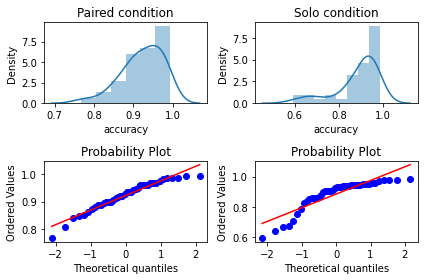

In [74]:
fig,ax = plt.subplots(2,2)
ax[0,0].set_title("Paired condition")
ax[0,1].set_title("Solo condition")
sns.distplot(training_rounds_dyads['accuracy'], ax=ax[0,0])
sns.distplot(training_rounds_solo['accuracy'], ax=ax[0,1])
stats.probplot(training_rounds_dyads['accuracy'], dist="norm", plot=ax[1,0])
stats.probplot(training_rounds_solo['accuracy'], dist="norm", plot=ax[1,1])
plt.tight_layout()

In [75]:
stat, p = stats.shapiro(training_rounds_dyads['accuracy'])
print('Normality test for accuracy in PAIRED condition')
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Sample is not Gaussian')

stat, p = stats.shapiro(training_rounds_solo['accuracy'])
print('Normality test for accuracy in SOLO condition')
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Sample is not Gaussian')

Normality test for accuracy in PAIRED condition
Statistics=0.939, p=0.033
Sample is not Gaussian
Normality test for accuracy in SOLO condition
Statistics=0.800, p=0.000
Sample is not Gaussian


In [76]:
stat, p = stats.mannwhitneyu(
    training_dyads['accuracy'], 
    training_solo['accuracy']
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=736.000, p=0.067


t(82)=1.824, p=0.072, note: non-parametric U test agrees with t-test

In [96]:
game_dyads = data[(data['stage']=='Game rounds') & (data['treatment']=='dyad')][['player','round','accuracy']]
game_dyads = game_dyads.groupby(['player','round'])['accuracy'].mean().reset_index()
#game_dyads.head()
print(game_dyads['accuracy'].mean())
print(stats.pearsonr(game_dyads['accuracy'],game_dyads['round']))

0.8900716479017402
(0.2288100438532274, 4.5199029458596233e-13)


In [4]:
data_training = data[data['stage']=='Training rounds'][['treatment', 'player', 'round', 'accuracy']]
data_game = data[data['stage']=='Game rounds']
data_game['tipo_ejemplar'] = data_game['kind'].apply(lambda x: 'terrier' if (x=='A' or x=='C') else 'hound')
dfN = data_game[(data_game['novice_in'] == data_game['tipo_ejemplar'])]
dfE = data_game[(data_game['expert_in'] == data_game['tipo_ejemplar'])]


<ipython-input-4-eb1981697635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_game['tipo_ejemplar'] = data_game['kind'].apply(lambda x: 'terrier' if (x=='A' or x=='C') else 'hound')


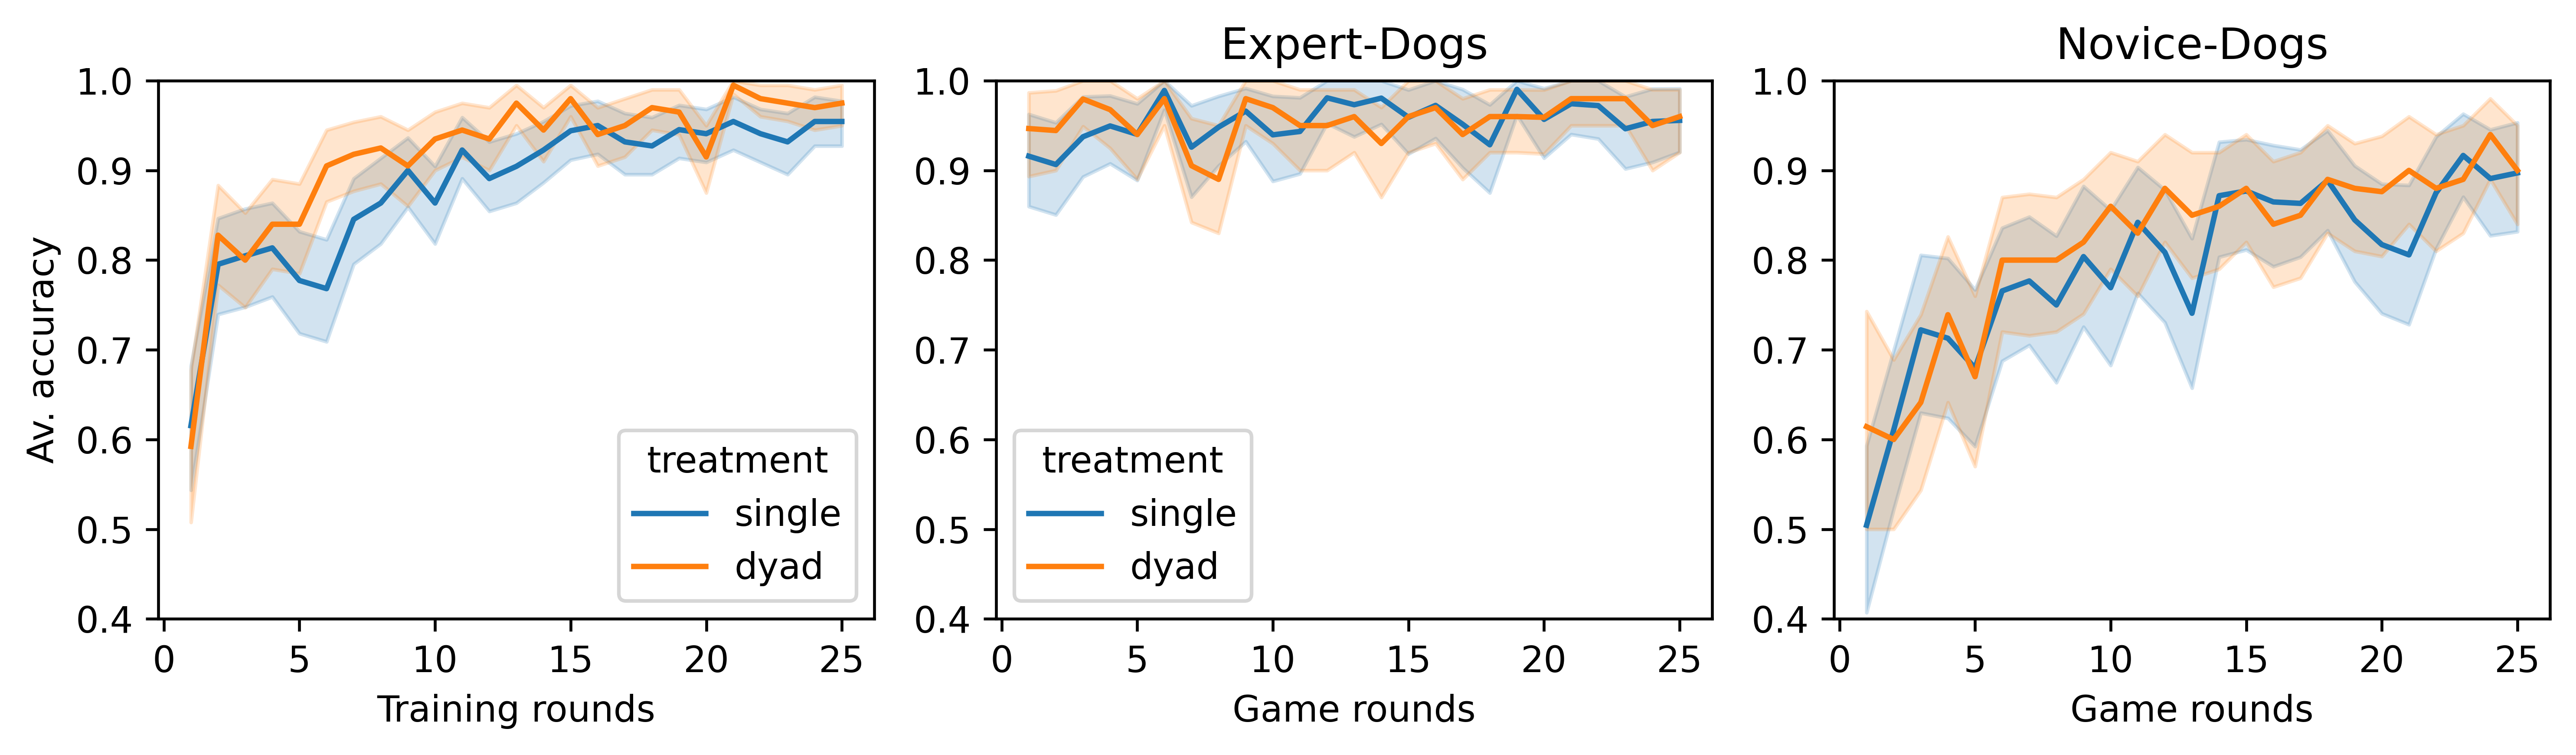

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), dpi=600)
sns.lineplot(x='round', y='accuracy', hue='treatment', data=data_training, ci=95, ax=ax[0])
sns.lineplot(x='round', y='accuracy', hue='treatment', data=dfE, ci=95, ax=ax[1])
sns.lineplot(x='round', y='accuracy', hue='treatment', data=dfN, ci=95, ax=ax[2])
ax[0].set_ylim(0.4, 1)
ax[0].set_xlabel('Training rounds')
ax[0].set_ylabel('Av. accuracy')
ax[0].set_ylim(0.4, 1)
ax[1].set_title("Expert-Dogs")
ax[1].set_xlabel("Game rounds")
ax[1].set_ylabel('')
ax[1].set_ylim(0.4, 1)
ax[2].set_title("Novice-Dogs")
ax[2].set_xlabel("Game rounds")
ax[2].set_ylabel("")
ax[2].set_ylim(0.4, 1)
ax[2].get_legend().remove()

fig.tight_layout()


In [6]:
fig.savefig('../imagenes/figura4.pdf')

FileNotFoundError: [Errno 2] No such file or directory: '../imagenes/figura4.pdf'

----

In [ ]:
dict_razas = {'A':'Cairn\n Terrier', 'C':'Norwich\n Terrier', 'B':'Irish\n Wolf\nhound', 'D':'Scottish\n Deer\nhound'}
dict_orden = {'A':1, 'C':2, 'B':3, 'D':4}

In [ ]:
df = pd.DataFrame(data[(data['treatment']=='dyad') & (data['stage']=='Game rounds')])
df['query'] = ['Yes' if x>0 else 'No' for x in df['queried']]
df = df.groupby(['novice_in', 'kind'])['query'].value_counts(dropna=False, normalize=True).reset_index(name='pregunta')
df = df[df['query']=='Yes']
del df['query']
df.columns = ['Novice in', 'kind', 'query']
df['query'] = df['query']*100
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df_preguntas = df
df_preguntas

In [ ]:
df = data.groupby('kind')['answered'].mean().reset_index()
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df.columns = ['kind', 'answered']
df_respondido = df
df_respondido.head()


In [ ]:
df = data.groupby('kind')['accuracy'].mean().reset_index()
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df.columns = ['kind', 'correct']
df_correcto = df
df_correcto.head()


In [ ]:
df_respuestas = pd.merge(df_respondido, df_correcto, on='kind')
df_respuestas

In [ ]:
reporte_comprension_novatos = reporte_comprension[(reporte_comprension['expertise']=='novices') & (reporte_comprension['treatment']=='dyad')]
reporte_comprension_novatos.head()


In [ ]:
df_msgs = pd.DataFrame(data[(data['treatment']=='dyad') & (data['stage']=='Game rounds')])
df_msgs['kind_dog'] = ['terrier' if (x=='A') or (x=='C') else 'hound' for x in df_msgs['kind']]
df_msgs = pd.DataFrame(df_msgs[(df_msgs['novice_in']==df_msgs['kind_dog'])])
df_msgs['queried'] = [x if x>0 else 0 for x in df_msgs['queried']]
df_msgs = df_msgs.groupby(['player', 'round'])['queried'].mean().reset_index(name='#msg')
df_msgs.head()


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=600)

sns.barplot(x='kind', y='query', hue='Novice in', data=df_preguntas, ax=ax[0, 0])
ax[0, 0].set_xlabel("Dog shown to player")
ax[0, 0].set(ylim=(0, 60))
ax[0, 0].set_ylabel("% of queries")
ax[0, 0].legend(title="Novices in", ncol=2, loc='upper center')#bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

respondido = df_respuestas['answered'].mean()
correcto = df_respuestas['correct'].mean()
sns.barplot(x=['answered', 'correct'], y=[100, 100], color = "cyan", ax=ax[0, 1])
sns.barplot(x=['answered', 'correct'], y=[respondido*100, correcto*100], color = "green", ax=ax[0, 1])
ax[0, 1].set_title("Experts' answers")
ax[0, 1].set_ylabel("% of messages")
topbar = plt.Rectangle((0,0),1,1,fc="cyan", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
ax[0, 1].legend([bottombar, topbar], ['Yes', 'No'], loc='lower right', ncol = 1, prop={'size':10})

sns.lineplot(x='round', y='#msg', data=df_msgs, ax=ax[1, 0], ci=95)
ax[1, 0].set_xlabel("Game rounds")
#ax[1, 0].set(ylim=(0, 2))
ax[1, 0].set_ylabel("Av. # of queries")
ax[1, 0].set_title("Number of queries\n on novice-dogs")

sns.regplot(x='queried', y='accuracy', data=reporte_comprension_novatos, ax=ax[1, 1])
ax[1, 1].set_title('Accuracy vs. Queries')
ax[1, 1].set_xlabel('# of queries')
ax[1, 1].set_ylabel('Accuracy')
#ax[1, 1].set(xlim=(0, 1.05))

fig.tight_layout()


In [ ]:
fig.savefig('../imagenes/figura5.pdf')

---

In [ ]:
reporte_comprension_expertos = pd.DataFrame(reporte_comprension[reporte_comprension['expertise']=='experts'])
reporte_comprension_expertos.head()

In [ ]:
# Leave out outlier
reporte_comprension_expertos = reporte_comprension_expertos[reporte_comprension_expertos['accuracy']>0.2]

In [ ]:
reporte_comprension_expertos_parejas = pd.DataFrame(reporte_comprension_expertos[reporte_comprension_expertos['treatment']=='dyad'])
reporte_comprension_expertos_individual = pd.DataFrame(reporte_comprension_expertos[reporte_comprension_expertos['treatment']=='single'])

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,6), dpi=600)
sns.boxplot(x='expertise', y='report', hue='treatment', data=reporte_comprension, ax=axes[0, 0])
sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos_individual, ax=axes[0, 1])
sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos_parejas, ax=axes[1, 1])
sns.regplot(y='report', x='player_responded', data=reporte_comprension_expertos_parejas, ax=axes[1, 0])

axes[0, 0].set_title('Distribution of Report')
axes[0, 0].set_ylabel('Report on term understanding')
axes[0, 0].set(ylim=(0.75, 7.25))
axes[1, 0].set_title('Report vs. Answers\n Dyad')
axes[1, 0].set_xlabel('Rate of queries answered')
axes[1, 0].set_ylabel('')
axes[1, 0].set(xlim=(0.05, 1.05))
axes[1, 0].set(ylim=(0.75, 7.25))
axes[0, 1].set_title('Report vs. Accuracy\n Single')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_ylabel('')
#axes[0, 1].set(xlim=(0.55, 1.05))
axes[0, 1].set(ylim=(0.75, 7.25))
axes[1, 1].set_title('Report vs. Accuracy\n Dyad')
axes[1, 1].set_xlabel('Accuracy')
axes[1, 1].set_ylabel('')
#axes[1, 1].set(xlim=(0.55, 1.05))
axes[1, 1].set(ylim=(0.75, 7.25))

fig.tight_layout()

In [ ]:
df_novatos_single = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='novices')]
df_novatos_parejas = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='novices')]


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,6), dpi=600)
sns.regplot(x='accuracy', y='report', data=df_novatos_single, ax=axes[0,0])
sns.regplot(x='accuracy', y='report', data=df_novatos_parejas, ax=axes[0,1])
sns.regplot(x='queried', y='report', data=df_novatos_parejas, ax=axes[1,0])
sns.regplot(x='answered', y='report', data=df_novatos_parejas, ax=axes[1,1])
axes[0,0].set_title('Report vs. Accuracy\n Single')
axes[0,0].set_xlabel('Accuracy')
axes[0,0].set_ylabel('')
axes[0,0].set(xlim=(0.45, 1.05))
axes[0,0].set(ylim=(0.75, 7.25))
axes[0,1].set_title('Report vs. Accuracy\n Dyad')
axes[0,1].set_xlabel('Accuracy')
axes[0,1].set_ylabel('')
axes[0,1].set(xlim=(0.45, 1.05))
#axes[0,0].set(ylim=(1, 7))

axes[1,0].set_title('Report vs. Queries\n Dyad')
axes[1,0].set_xlabel('# of dogs queried')
axes[1,0].set_ylabel('')
#axes[1,0].set(xlim=(0, 1.05))
#axes[0,1].set(ylim=(1, 7))
axes[1,1].set_title('Report vs. Answers\n Dyad')
axes[1,1].set_xlabel('Rate of queries answered')
axes[1,1].set_ylabel('')
axes[1,1].set(xlim=(0, 1.05))
#axes[0,2].set(ylim=(1, 7))

fig.tight_layout()

---

In [ ]:
reporte_comprension_novatos_pareja = pd.DataFrame(reporte_comprension_novatos[reporte_comprension_novatos['treatment']=='dyad'])
reporte_comprension_novatos_pareja[['queried', 'accuracy']].corr()


In [ ]:
# Expertos entre tratamientos
x = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='experts')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='experts')]['report']
print("Diferencia de medias entre expertos en los dos tratamientos:", stats.ttest_ind(x,y).pvalue)

# Novatos entre tratamientos
x = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='novices')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='novices')]['report']
print("Diferencia de medias entre novatos en los dos tratamientos:", stats.ttest_ind(x,y).pvalue)

# Individual entre experticia
x = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='experts')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='novices')]['report']
print("Diferencia de medias entre experticia en individuos:", stats.ttest_ind(x,y).pvalue)

# Parejas entre experticia
x = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='experts')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='novices')]['report']
print("Diferencia de medias entre experticia en parejas:", stats.ttest_ind(x,y).pvalue)


### Regression models

In [ ]:
reporte_comprension_expertos_individual[['report', 'accuracy']].corr()

In [ ]:
model = ols("report ~ accuracy", data=reporte_comprension_expertos_individual)
results = model.fit()
results.summary()

In [ ]:
reporte_comprension_expertos_parejas[['report', 'accuracy', 'player_responded']].corr()

In [ ]:
model = ols("report ~ accuracy", data=reporte_comprension_expertos_parejas)
results = model.fit()
results.summary()

In [ ]:
df_novatos_single[['report', 'accuracy']].corr()

In [ ]:
df_novatos_parejas[['report', 'accuracy']].corr()

In [ ]:
df_novatos_parejas[['report', 'accuracy', 'queried', 'answered']].corr()


In [ ]:
model = ols("report ~ accuracy + queried + answered", data=df_novatos_parejas)
results = model.fit()
results.summary()